In [1]:
import pandas as pd
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('nyc_population_area.csv')
data['p of coming from i'] = data['pop'] / sum(data['pop'])
data['pop density'] = data['pop']/data['area (m^2)']
data['percentage of pop density'] = data['pop density'] / sum(data['pop density'])
data.head()

,name,pop,area (m^2),p of coming from i,pop density,percentage of pop density
0,42467159,3094,166136,0.000631,0.018623,0.000647
1,42467069,2863,182479,0.000584,0.015689,0.000545
2,42466853,2228,188108,0.000454,0.011844,0.000411
3,1413215971,3597,119678,0.000733,0.030056,0.001044
4,42466495,4495,167532,0.000917,0.026831,0.000932


In [3]:
def lamda(volunteer):
    return volunteer * 0.3 * data['percentage of pop density']/data['area (m^2)']

In [4]:
def f(t,lam):
    ans = 0
    for i in range(len(data)):
        ans += (- math.pi * (s**2) * l[i] * 2 * (t - 3)) * data['p of coming from i'].loc[i] * math.exp(-math.pi * (s**2) * ((t-3)**2) * lam[i])
    return -ans

In [5]:
survival = []
#m/min
s = 60
for i in range(1000,12001,1000):
    l = lamda(i)
    survival.append(integrate.quad(lambda t : (1 + math.exp(0.678+0.262*t))**(-1) * f(t,l),3,3+14.974)[0])

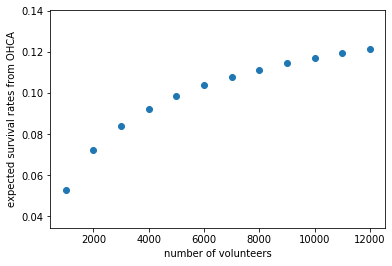

In [6]:
volunteer = [i for i in range(1000,12001,1000)]
plt.xlabel('number of volunteers')
plt.ylabel('expected survival rates from OHCA')
plt.scatter(volunteer,survival)



In [7]:
l = lamda(5000)
survival = integrate.quad(lambda t : (1 + math.exp(0.678+0.262*t))**(-1) * f(t,l),3,3+14.974)[0]
print("Survival of 5000 vol is " + str(survival))

Survival of 5000 vol is 0.09870892630303828


In [8]:
l = lamda(12000)
survival = integrate.quad(lambda t : (1 + math.exp(0.678+0.262*t))**(-1) * f(t,l),3,3+14.974)[0]
print("Survival of 12000 vol is " + str(survival))

Survival of 12000 vol is 0.12163856265397005


In [9]:
def new_lamda(volunteer):
    return volunteer * 0.3 * data['p of coming from i']/data['area (m^2)']

In [10]:
l = new_lamda(12000)
survival = integrate.quad(lambda t : (1 + math.exp(0.678+0.262*t))**(-1) * f(t,l),3,3+14.974)[0]
print("Survival of 12000 vol is " + str(survival))

Survival of 12000 vol is 0.12478652230411186


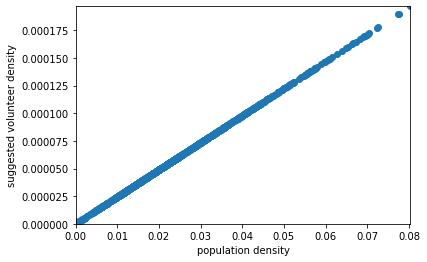

In [11]:
volunteer_density = new_lamda(12000)/0.3
plt.xlim(0, max(data['pop density']))
plt.ylim(0, max(volunteer_density))
plt.xlabel('population density')
plt.ylabel('suggested volunteer density')
plt.scatter(data['pop density'],volunteer_density)